In [173]:
import pandas as pd
import numpy as np
import scipy
import os
import os.path
from matplotlib import cm
from IPython.display import display, HTML

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Labling Time Series, Exporting Graphics (zimoma)

Use snb-data-zimoma-en-all-20170502_1430.csv to complete the following exercise:

Add the following information to the time series plot of the 1TGT data:
- 1973-11: Oil Price Shock

- 1991-01 – 1993-12: Recession in Switzerland

- 2009-01 – 2009-12: Recession in Switzerland

- 2008-09: Lehman-Brothers collapse

- 2011-08: Introduction of CHF/EUR floor

- 2015-01: Removal of CHF/EUR floor

(Matplotlib hints: http://matplotlib.org/users/annotations.html, axhspan )

Export your graphics, and put together a PowerPoint (or equivalent) presentation to highlight the effect of the events above on the money-market rates. Try with different typefaces, remember the grid when laying the result out.

In [174]:
df = pd.read_csv('snb-data-zimoma-en-all-20170502_1430.csv')
df

,Date,D0,Value
0,1972-01,SARON,NaN
1,1972-01,1TGT,0.00000
2,1972-01,EG3M,NaN
3,1972-01,1M,NaN
4,1972-01,3M0,NaN
...,...,...,...
5979,2017-04,12M,-0.49160
5980,2017-04,3M1,1.17233
5981,2017-04,3M2,0.00243
5982,2017-04,3M3,0.32525


In [175]:
# The natural order of duration is ['SARON', '1TGT', '1M', 'EG3M', '3M0', '3M1', '3M2', '3M3', '3M4', '6M', '12M']
pd.unique(df['D0'])

array(['SARON', '1TGT', 'EG3M', '1M', '3M0', '6M', '12M', '3M1', '3M2',
       '3M3', '3M4'], dtype=object)

In [176]:
# line chart of 1TGT series

import bokeh
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
output_notebook()

df['Date'] = pd.to_datetime(df['Date'])

tdf = df.pivot(index='Date', columns='D0', values='Value').reset_index()
p = figure(x_axis_type="datetime")
p.line(x=tdf['Date'], y=tdf['1TGT'])
show(p)

Loading BokehJS ...

In [177]:
df['Date'] = pd.to_datetime(df['Date'])
tdf = df.set_index(['Date', 'D0']).unstack()['Value']
term_order = ['1TGT']
tdf = tdf[term_order]
tdf.head()

D0,1TGT
Date,
1972-01-01,0.000
1972-02-01,0.000
1972-03-01,0.125
1972-04-01,0.250
1972-05-01,1.500


Text(2004-01-01 00:00:00, 12.5, 'Recession in CH')

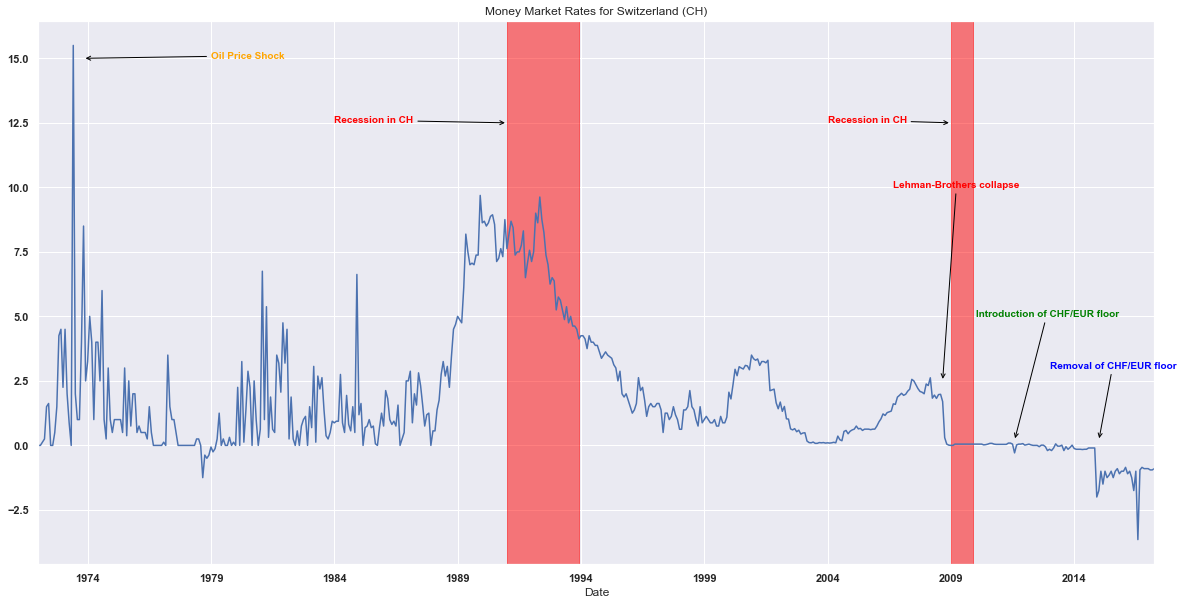

In [178]:
#1973-11: Oil Price Shock
#1991-01 – 1993-12: Recession in Switzerland
#2009-01 – 2009-12: Recession in Switzerland
#2008-09: Lehman-Brothers collapse
#2011-08: Introduction of CHF/EUR floor
#2015-01: Removal of CHF/EUR floor


ax = tdf.plot(figsize=(20,10),title='Money Market Rates for Switzerland (CH)',legend=False) #the main plot


#annotation 1
oilpriceshock_s = pd.to_datetime('1973-11')
oilpriceshock_e = pd.to_datetime('1979-01') 

ax.annotate("Oil Price Shock",
            xy=(oilpriceshock_s, 15), xycoords='data',
            xytext=(oilpriceshock_e, 15), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",color='black'),color='orange',size=10
            )

#annotation 2
collapse_s = pd.to_datetime('2008-09')
collapse_e = pd.to_datetime('2006-09')

ax.annotate("Lehman-Brothers collapse",
            xy=(collapse_s, 2.5), xycoords='data',
            xytext=(collapse_e, 10), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",color='black'),color='red',size=10
            )

#annotation 3
floor_s = pd.to_datetime('2011-08')
floor_e = pd.to_datetime('2010-01')

ax.annotate("Introduction of CHF/EUR floor",
            xy=(floor_s, 0.2), xycoords='data',
            xytext=(floor_e, 5), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",color='black'),color='green',size=10
            )

#annotation 4
floor_end_s = pd.to_datetime('2015-01')
floor_end_e = pd.to_datetime('2013-01')

ax.annotate("Removal of CHF/EUR floor",
            xy=(floor_end_s, 0.2), xycoords='data',
            xytext=(floor_end_e, 3), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",color='black'),color='blue',size=10
            )

#annotation 5 
recess_s = pd.to_datetime('1991-01')
recess_e = pd.to_datetime('1993-12')
a=pd.to_datetime('1984')
plt.axvspan(recess_s, recess_e, color='red', alpha=0.5)

ax.annotate("Recession in CH",
            xy=(recess_s, 12.5), xycoords='data',
            xytext=(a, 12.5), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",color='black'),color='red',size=10
            )

#annotation 6  #2009-01 – 2009-12: Recession in Switzerland
recess_s2 = pd.to_datetime('2009-01')
recess_e2 = pd.to_datetime('2009-12')
b=pd.to_datetime('2004')
plt.axvspan(recess_s2, recess_e2, color='red', alpha=0.5)

ax.annotate("Recession in CH",
            xy=(recess_s2, 12.5), xycoords='data',
            xytext=(b, 12.5), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",color='black'),color='red',size=10
            )

# Labling Scatterplot (mpg.csv)

Use mpg.csv to complete the following exercise:

Yesterday, you made a plots of displacement vs. highway fuel efficiency for all cars in the data set. Improve these plots by emphasizing and annotating the cars with the best/worst hwy efficiency.

- One plot with all cars; emphasize/annotate the cars with the best and worst hwy efficiency

- A plot faceted by class with the best and worst hwy efficiency in the class emphasized/annotated

In [179]:
df2 = pd.read_csv('mpg.csv')
df2['trans_type']= df2['trans'].apply(lambda x: x.split('(')[0])

In [180]:
df2

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,trans_type
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,auto
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,manual
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,auto
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,manual


### 1.  One plot with all cars; emphasize/annotate the cars with the best and worst hwy efficiency

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


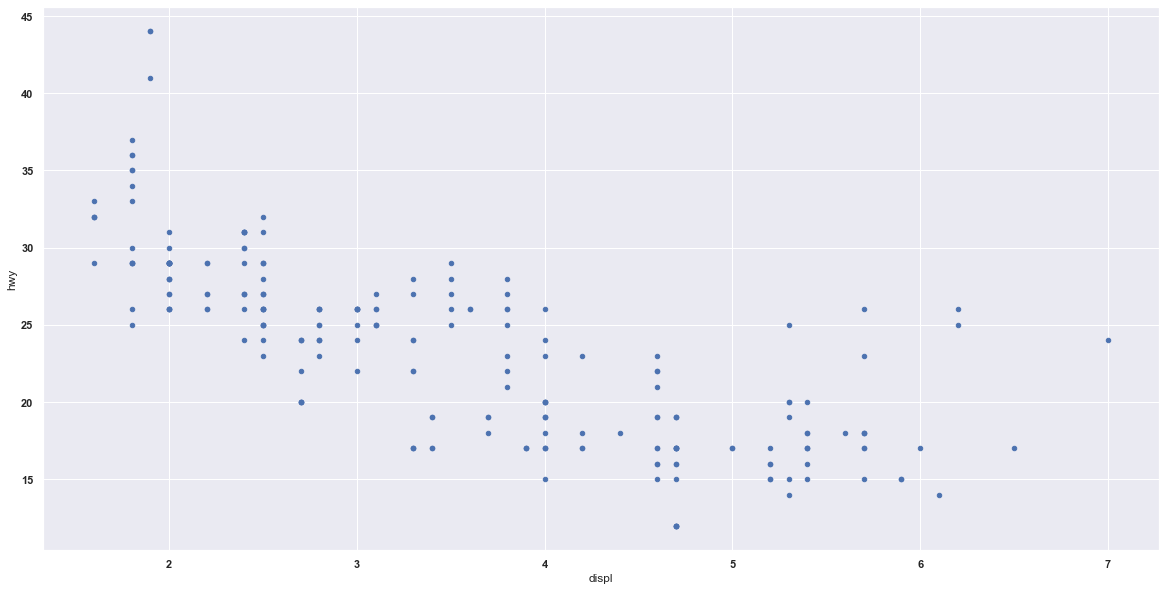

In [181]:
ax = df2.plot(x='displ',y='hwy',figsize=(20,10),legend=False,kind='scatter') #the main plot

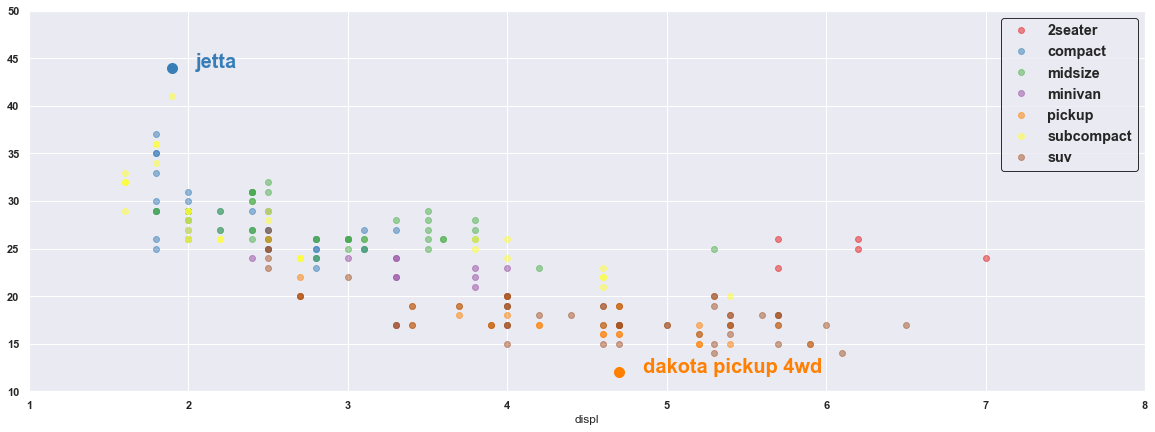

In [197]:
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb
fig, ax = plt.subplots(figsize=(20, 7))
groups = df2.groupby('class')
colors = sns.mpl_palette("Set1", 7)
color_class = {}
for (idx, (name, group)) in enumerate(groups):
    c_rgb = colors[idx]  #assign rgb color values to variable
    color_class[name] = c_rgb  
    group.plot('displ', 'hwy', marker='.', linestyle='', c=c_rgb, ms=12, alpha=0.5, label=name, ax=ax)
    
max_hwy = df2.iloc[df2['hwy'].idxmax()]
ax.plot(max_hwy['displ'], max_hwy['hwy'], marker='.', ms=20, c=color_class[max_hwy['class']], alpha=1)

#annotation 1
ax.annotate(max_hwy['model'], 
            xy=(max_hwy['displ'], max_hwy['hwy']), 
            xytext=(max_hwy['displ'] + 0.15, max_hwy['hwy']), 
            color=color_class[max_hwy['class']],
            fontsize=20)

min_hwy = df2.iloc[df2['hwy'].idxmin()]
ax.plot(min_hwy['displ'], min_hwy['hwy'], marker='.', ms=20, c=color_class[min_hwy['class']], alpha=1)

#annotation2
ax.annotate(min_hwy['model'], 
            xy=(min_hwy['displ'], min_hwy['hwy']), 
            xytext=(min_hwy['displ'] + 0.15, min_hwy['hwy']), 
            color=color_class[min_hwy['class']],
            fontsize=20)

ax.set_xlim([1, 8])
ax.set_ylim([10, 50])
_ = ax.legend(fontsize='large',edgecolor='black')


### 2. A plot faceted by class with the best and worst hwy efficiency in the class emphasized/annotated

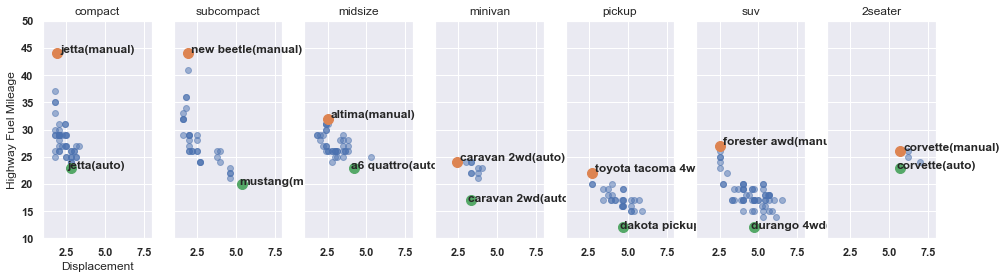

In [204]:
fig, axs = plt.subplots(1, 7, figsize=(16, 4), sharex=True, sharey=True)
groups = df2.groupby('class')

mean_displ = df2.groupby('class').mean()['displ'].sort_values()
class_to_index = {}
for cls, idx in zip(mean_displ.index, range(len(mean_displ.index))):
    class_to_index[cls] = idx
for name, group in groups:
    index = class_to_index[name]
    ax = axs[index]
    ax.plot(group['displ'], group['hwy'], marker='.', linestyle='', ms=12, alpha=0.5, label=name)
    ax.set_xlim([1, 8])
    ax.set_ylim([10, 50])
    ax.set_title(name)
    if index < 1:
        ax.xaxis.set_label_text('Displacement')
        ax.yaxis.set_label_text('Highway Fuel Mileage')
    max_hwy = group.loc[group['hwy'].idxmax()]
    ax.plot(max_hwy['displ'], max_hwy['hwy'], marker='.', ms=20, alpha=1)
    ax.annotate("{}({})".format(max_hwy['model'], max_hwy['trans_type']),
                xy=(max_hwy['displ'], max_hwy['hwy']), 
                xytext=(max_hwy['displ'] + 0.2, max_hwy['hwy'] + 0.2))
    min_hwy = group.loc[group['hwy'].idxmin()]
    ax.plot(min_hwy['displ'], min_hwy['hwy'], marker='.', ms=20, alpha=1)
    ax.annotate("{}({})".format(min_hwy['model'], min_hwy['trans_type']), 
                xy=(min_hwy['displ'], min_hwy['hwy']), 
                xytext=(min_hwy['displ'] - 0.2, min_hwy['hwy'] - 0.2))

# Anscombe (anscombe.csv)
Use anscombe.csv to complete the following exercise:

Load in the anscombe.csv data

- There are 4 data sets in the file (indicated by the dataset column): what is the mean x, and mean y for each data set?

- Compute a linear regression for each data set. What is the slope and intercept?

- Plot the data, faceted by data set (i.e., 4 subplots), drawing the points at their specified x/y values, and draw regression lines. Label the regression lines with slope, intercept, and r^2.

In [206]:
df3 = pd.read_csv('anscombe.csv')
df3.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


### 1. There are 4 data sets in the file (indicated by the dataset column): what is the mean x, and mean y for each data set?

In [208]:
df3.groupby('dataset').nunique()

,dataset,x,y
dataset,,,
I,1,11,11
II,1,11,11
III,1,11,11
IV,1,2,11


### 2. Compute a linear regression for each data set. What is the slope and intercept?

In [209]:
df3.groupby('dataset').mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


### 3. Plot the data, faceted by data set (i.e., 4 subplots), drawing the points at their specified x/y values, and draw regression lines. Label the regression lines with slope, intercept, and r^2

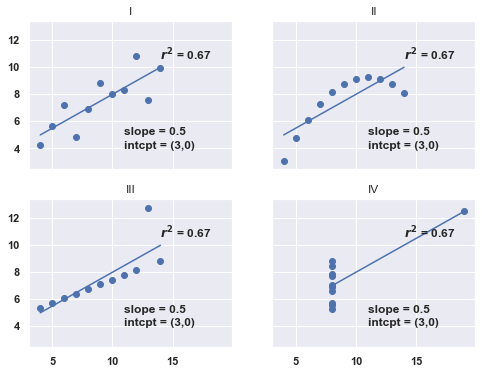

In [210]:
import statsmodels.formula.api as smf

def fit_and_predict(df3):
    lm = smf.ols(formula="y ~ x", data=df3).fit()
    x_bounds = [df3['x'].min(), df3['x'].max()]
    preds_input = pd.DataFrame({'x': x_bounds})
    predictions = lm.predict(preds_input)
    return lm, pd.DataFrame({'x': x_bounds, 'y': predictions})

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 6))
for index, (name, tdf) in enumerate(df3.groupby('dataset')):
    col = index % 2
    row = (index - col) // 2
    ax = axs[row][col]
    ax.scatter(tdf['x'], tdf['y'])
    lm, pred = fit_and_predict(tdf)
    ax.plot(pred['x'], pred['y'])
    ax.text(14, 10.5, "$r^2$ = {:.2f}".format(lm.rsquared))
    ax.text(11, 5, "slope = {:.1f}".format(lm.params.x))
    ax.text(11, 4, "intcpt = ({:.0f},0)".format(lm.params.Intercept))
    ax.set_title(name)

# Burtin
Use burtin.json to complete the following exercise:



Come up with alternates to Will Burtin’s visualizations of the efficacy of three antibiotics on various bacteria. Present your results as a PowerPoint.

- I have a bacterial infection (bacterium unknown): which antibiotic, and in what concentration, should I take?

- I am infected by a gram + bacteria: which antibiotic, and in what concentration, should I take?

- I am infected by a gram - bacteria: which antibiotic, and in what concentration, should I take?

- Which species of bacteria should I be most concerned about in terms of antibiotic resistance?

- Which antibiotic is most effective against each bacterium?

- Which bacteria is penicillin most effective against? Same for streptomycin, neomycin?

- What patterns are there? How can you emphasize them?